In [43]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models,backend
import pandas as pd
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt

## Part 1: Data Preprocessing

### Load Data

In [2]:
# 設定資料路徑                         變數的設置是為了讓程式在後續載入資料時能清楚知道各天氣類別的影像在哪裡
# training data path
trcloudy='weather_image/train/cloudy/'
trrain='weather_image/train/rain/'
trshine='weather_image/train/shine/'
trsunrise='weather_image/train/sunrise/'
# testing data path
testpath='weather_image/test/'      #用來繳交上傳檔案

In [3]:
# 顯示資料筆數  os.listdir(path):這個函數來自 Python 的 os 模組，它會列出指定路徑下的所有檔案和資料夾名稱，並以清單（list）形式回傳。
# 由此可知，每一類別有幾筆的資料
#---------------------to-do--------------------------------------------#
cloudy_filelist = os.listdir(trcloudy)
rain_filelist = os.listdir(trrain)
shine_filelist = os.listdir(trshine)
sunrise_filelist = os.listdir(trsunrise)
test_filelist = os.listdir(testpath)

print(f'Cloudy images: {len(cloudy_filelist)}')
print(f'Rain images: {len(rain_filelist)}')
print(f'Shine images: {len(shine_filelist)}')
print(f'Sunrise images: {len(sunrise_filelist)}')
print(f'test images: {len(test_filelist)}')
#---------------------to-do--------------------------------------------#

Cloudy images: 280
Rain images: 199
Shine images: 232
Sunrise images: 337
test images: 75


### convert image data to numpy

In [13]:
# convert the train data to numpy
#---------------------to-do--------------------------------------------#
tr_label=list()                 # 儲存每個影像的檔名
tr_data=np.empty(shape=(1048,300,300,3))    # 初始化空的 NumPy 陣列，用於存放影像資料
x=0                       # 記錄已處理的影像數量

#1. 處理「cloudy」影像
for file in cloudy_filelist:
  img_data = f'{trcloudy}/{file}'
  img = cv2.imread(img_data)
  img = cv2.resize(img, (300, 300))
  tr_data[x] = img
  tr_label.append('cloudy')
  x += 1

#2. 處理「rain」影像
for file in rain_filelist:
  img_data = f'{trrain}/{file}'
  img = cv2.imread(img_data)
  img = cv2.resize(img, (300, 300))
  tr_data[x] = img
  tr_label.append('rain')
  x += 1

#3. 處理「shine」影像
for file in shine_filelist:
  img_data = f'{trshine}/{file}'
  img = cv2.imread(img_data)
  img = cv2.resize(img, (300, 300))
  tr_data[x] = img
  tr_label.append('shine')
  x += 1

#4. 處理「sunrise」影像
for file in sunrise_filelist:
  img_data = f'{trsunrise}/{file}'
  img = cv2.imread(img_data)
  img = cv2.resize(img, (300, 300))
  tr_data[x] = img
  tr_label.append('sunrise')
  x += 1

#---------------------to-do--------------------------------------------#
tr_label=np.array(tr_label)

In [14]:
# convert the test data to numpy
test_filename=list()
test_data=np.empty(shape=(75,300,300,3))
#---------------------to-do--------------------------------------------#
x = 0
for file in test_filelist:
  img_data = f'{testpath}/{file}'
  img = cv2.imread(img_data)
  img = cv2.resize(img, (300, 300))
  test_data[x] = img
  test_filename.append(file)
  x += 1

test_filename = np.array(test_filename)
#---------------------to-do--------------------------------------------#

In [15]:
# show data size
#---------------------to-do--------------------------------------------#
print(f'train data size : {tr_data.shape}')
print(f'train label size : {tr_label.shape}')
print(f'test data size : {test_data.shape}')
#總共有1048張圖片 300*300 RGB 75張測試資料

print(f'length of train label : {len(tr_label)}')
#---------------------to-do--------------------------------------------#

train data size : (1048, 300, 300, 3)
train label size : (1048,)
test data size : (75, 300, 300, 3)
length of train label : 1048


### shuffle

In [16]:
# one-hot label 用onehot編碼 並打亂資料順序
#---------------------to-do--------------------------------------------#
#用onehot編碼
label_map = {'cloudy':0, 'rain':1, 'shine':2, 'sunrise':3}
tr_one_hot = np.zeros((len(tr_label), 4))
for i in range(len(tr_label)):
  tr_one_hot[i][label_map[tr_label[i]]] = 1
#---------------------to-do--------------------------------------------#

In [17]:
# 打亂資料順序
idx = np.arange(len(tr_data))
np.random.shuffle(idx)

tr_data = tr_data[idx]
tr_label = tr_one_hot[idx]

tr_label[0] one-hot: [1. 0. 0. 0.]
tr_label[1] one-hot: [0. 0. 0. 1.]
tr_label[2] one-hot: [0. 0. 1. 0.]
tr_label[3] one-hot: [0. 0. 0. 1.]
tr_label[4] one-hot: [1. 0. 0. 0.]


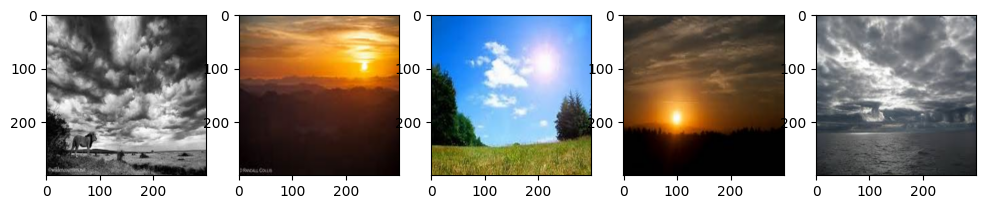

train data size : (1048, 300, 300, 3)
train label size : (1048, 4)
test data size : (75, 300, 300, 3)
length of train label : 1048


In [ ]:
# 檢查shuffle & one-hot
label_map = {'cloudy':0, 'rain':1, 'shine':2, 'sunrise':3}
label_map2 = {0:'cloudy', 1:'rain', 2:'shine', 3:'sunrise'}

plt.figure(figsize=(12, 6))
for i in range(5):
    img = np.clip(tr_data[i], 0, 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    print(f'tr_label[{i}] one-hot: {tr_label[i]}')
plt.show()

In [ ]:
# show data size
#---------------------to-do--------------------------------------------#
print(f'train data size : {tr_data.shape}')
print(f'train label size : {tr_label.shape}')
print(f'test data size : {test_data.shape}')
#總共有1048張圖片 300*300 RGB 75張測試資料

print(f'length of train label : {len(tr_label)}')
#---------------------to-do--------------------------------------------#

### train_validation data split 從訓練資料中拿出一部分來驗證

In [19]:
# train_validation data split
# val_data數量固定262個
#---------------------to-do--------------------------------------------#
val_data = tr_data[:262]
val_label = tr_label[:262]
train_data = tr_data[262:]
train_label = tr_label[262:]

#---------------------to-do--------------------------------------------#
print('train data size: ',train_data.shape)
print('train label size: ',train_label.shape)
print('validation data size: ',val_data.shape)
print('validation label size: ',val_label.shape)

train data size:  (786, 300, 300, 3)
train label size:  (786, 4)
validation data size:  (262, 300, 300, 3)
validation label size:  (262, 4)


In [ ]:
# data augumentation
datagen = ImageDataGenerator(
    rotation_range=30,          
    width_shift_range=0.2,      
    height_shift_range=0.2,     
    shear_range=0.2,            
    zoom_range=0.2,            
    horizontal_flip=True,       
    fill_mode='nearest'         
)

num_augmented_samples = len(train_data) // 2 # 擴增50%

augmented_data = []
augmented_labels = []
for i in range(num_augmented_samples):
    img = train_data[i]
    img = np.expand_dims(img, 0)
    augmented_img = datagen.random_transform(img[0])
    augmented_data.append(augmented_img)
    augmented_labels.append(train_label[i])
    
# 合併
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)
train_data = np.concatenate((train_data, augmented_data), axis=0)
train_label = np.concatenate((train_label, augmented_labels), axis=0)

print("train data after augmentation:", train_data.shape)
print("train label after augmentation:", train_label.shape)

train data after augmentation: (1179, 300, 300, 3)
train label after augmentation: (1179, 4)


tr_label[0] one-hot: [0. 0. 0. 1.]
tr_label[1] one-hot: [0. 1. 0. 0.]
tr_label[2] one-hot: [0. 0. 0. 1.]
tr_label[3] one-hot: [0. 1. 0. 0.]
tr_label[4] one-hot: [0. 0. 0. 1.]


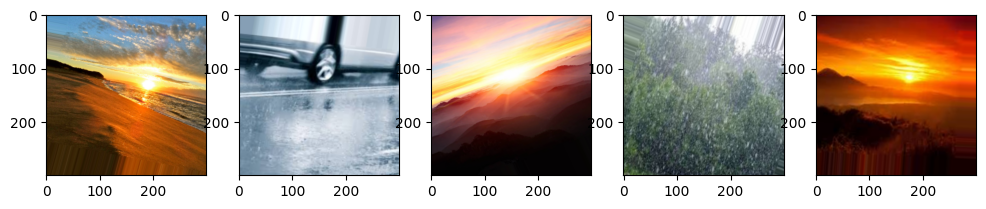

In [ ]:
# check data augmentation 
plt.figure(figsize=(12, 6))
for i in range(5):
    img = np.clip(augmented_data[i], 0, 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    print(f'tr_label[{i}] one-hot: {augmented_labels[i]}')
plt.show()

In [ ]:
# check data size
print('train data size: ', train_data.shape)
print('train label size: ', train_label.shape)
print('validation data size: ', val_data.shape)
print('valid label size: ', val_label.shape)
print('test label size: ', test_data.shape)

train data size:  (1179, 300, 300, 3)
train label size:  (1179, 4)
validation data size:  (262, 300, 300, 3)
valid label size:  (262, 4)
test label size:  (75, 300, 300, 3)


## Part 2: Build a simple CNN

In [44]:
backend.clear_session()

# define model
cnn = models.Sequential() # name the network 初始化
#---------------------to-do--------------------------------------------#
#層的定義不能與顯示相同，需要自己建立自己的
# feature extraction 利用cnn.add 加入convolution layer padding MaxPooling
cnn.add(layers.BatchNormalization(input_shape=(300, 300, 3))) 

cnn.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

# Flatten
cnn.add(layers.Flatten())

cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(4, activation='softmax'))
# show the model structure
#---------------------to-do--------------------------------------------#
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 300, 300, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                        

In [27]:
# comiple model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

#---------------------to-do--------------------------------------------#
cnn.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])
#---------------------to-do--------------------------------------------#

In [ ]:
#---------------------to-do--------------------------------------------#

# backend.clear_session()

checkpoint = ModelCheckpoint(
    filepath = 'final/model_epoch_{epoch}.weights.h5',  
    save_weights_only = True,     
    save_best_only = False,       
    verbose=0                   
)

# cnn.load_weights('modelv12/model_epoch_18.weights.h5')

history = cnn.fit(
    train_data,
    train_label,
    epochs=30,
    batch_size=32,
    validation_data = (val_data, val_label),
    verbose=1,  
    callbacks = [checkpoint]  
)

#---------------------to-do--------------------------------------------#

Epoch 1/30
37/37 [==============================] - 83s 2s/step - loss: 1.0319 - accuracy: 0.5573 - val_loss: 0.8103 - val_accuracy: 0.7023
Epoch 2/30
37/37 [==============================] - 79s 2s/step - loss: 0.6586 - accuracy: 0.7583 - val_loss: 0.4658 - val_accuracy: 0.8321
Epoch 3/30
37/37 [==============================] - 75s 2s/step - loss: 0.4690 - accuracy: 0.8482 - val_loss: 0.3818 - val_accuracy: 0.8855
Epoch 4/30
37/37 [==============================] - 74s 2s/step - loss: 0.3715 - accuracy: 0.8719 - val_loss: 0.3614 - val_accuracy: 0.8817
Epoch 5/30
37/37 [==============================] - 76s 2s/step - loss: 0.3489 - accuracy: 0.8880 - val_loss: 0.2901 - val_accuracy: 0.9046
Epoch 6/30
37/37 [==============================] - 79s 2s/step - loss: 0.4081 - accuracy: 0.8643 - val_loss: 0.2952 - val_accuracy: 0.8893
Epoch 7/30
37/37 [==============================] - 76s 2s/step - loss: 0.2919 - accuracy: 0.8948 - val_loss: 0.2171 - val_accuracy: 0.9122
Epoch 8/30
37/37 [==

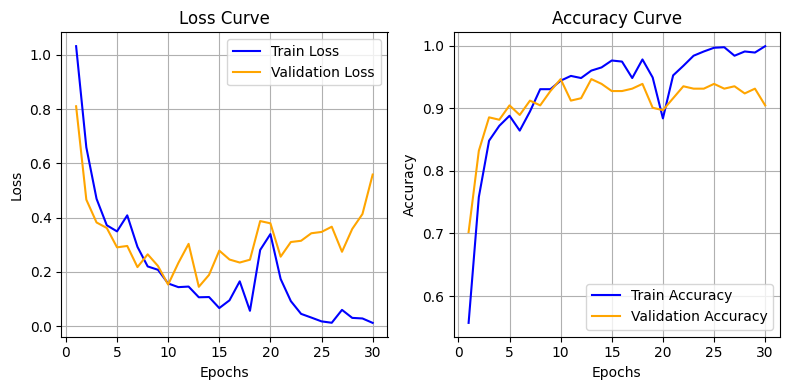

In [31]:
# 印出 loss curve   和  accuracy curve
#---------------------to-do--------------------------------------------#
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# loss curve
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, train_loss, 'blue', label='Train Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.legend()
plt.grid()

# accuracy curve
plt.subplot(122)
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, train_accuracy, 'blue', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()  
plt.show()

#---------------------to-do--------------------------------------------#


### Plot the confusion matrix

9/9 [==============================] - 3s 276ms/step


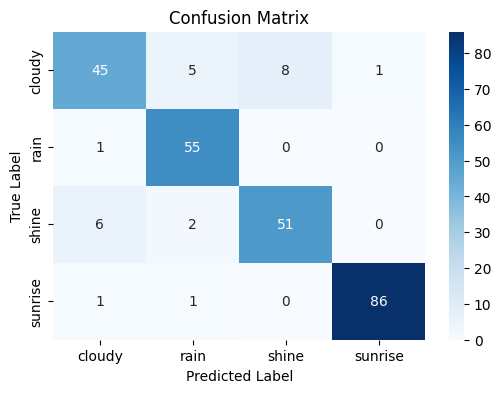

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

# cnn.load_weights('final/model_epoch_30.weights.h5')
#---------------------to-do--------------------------------------------#
val_prediction = cnn.predict(val_data)
predicted_label = np.argmax(val_prediction, axis=1)
true_label = np.argmax(val_label, axis=1)

cm = confusion_matrix(true_label, predicted_label)

plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['cloudy', 'rain', 'shine', 'sunrise'],
            yticklabels=['cloudy', 'rain', 'shine', 'sunrise'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#---------------------to-do--------------------------------------------#

# Output the csv file

In [ ]:
#印出預測值
#---------------------to-do--------------------------------------------#
predictions = cnn.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

#---------------------to-do--------------------------------------------#

3/3 [==============================] - 1s 208ms/step


In [ ]:
test_label=pd.DataFrame()
test_label['image_id']=test_filename
test_label['labels']=predicted_labels
test_label=test_label.sort_values(by='image_id')
test_label.to_csv('weather_image/predict_label12.csv',index=False) #結果轉csv檔

# Part3: Data augmentation

資料擴增部分，在model訓練前已擴增50% train data，再加入train data，train data size是沒擴充的1.5倍，前面也有印出過擴增完的圖片，故不在這裡演示。

In [ ]:
#定義data_augmentation 利用tf.keras.Sequential 去做隨機翻轉
#---------------------to-do--------------------------------------------#




#---------------------to-do--------------------------------------------#

In [ ]:
#任意在訓練資料中找一張圖片，並印出增強後的照片
#---------------------to-do--------------------------------------------#







#---------------------to-do--------------------------------------------#